### Importation des modules 

In [2]:
import pandas as pd
import numpy as np

C:\Users\pdevi\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Importation des données

In [2]:
questions_data_path = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Project_4/data_questions/BIG_DATA.csv"

questions_data_df=pd.read_csv(questions_data_path)

print(questions_data_df.shape)

(50000, 9)


#### Description générale des données

In [3]:
# Aperçu des données
print(questions_data_df.head())
print(questions_data_df.info())
print(questions_data_df.describe())

         Id                                             Title  ViewCount  \
0  11346283                   Renaming column names in Pandas    6536327   
1  11285613  Selecting multiple columns in a Pandas dataframe    4059727   
2  15891038                      Change column type in pandas    3981500   
3   5226311      Installing specific package version with pip    2756640   
4  13148429     How to change the order of DataFrame columns?    2522216   

   Score                                               Body  \
0   2984  <p>I want to change the column labels of a Pan...   
1   1759  <p>How do I select columns <code>a</code> and ...   
2   1534  <p>I created a DataFrame from a list of lists:...   
3   1968  <p>I am trying to install version 1.2.2 of <co...   
4   1646  <p>I have the following DataFrame (<code>df</c...   

                                             Tags         CreationDate  \
0    <python><pandas><replace><dataframe><rename>  2012-07-05 14:21:15   
1   <python><pan

In [4]:
def convert_tags_to_csv(tags):
    return tags.replace('><', ',').replace('<', '').replace('>', '')

# Apply the function to the 'NumTags' column
questions_data_df['Tags'] = questions_data_df['Tags'].apply(convert_tags_to_csv)

### Analyse Univariée

Distribution des scores

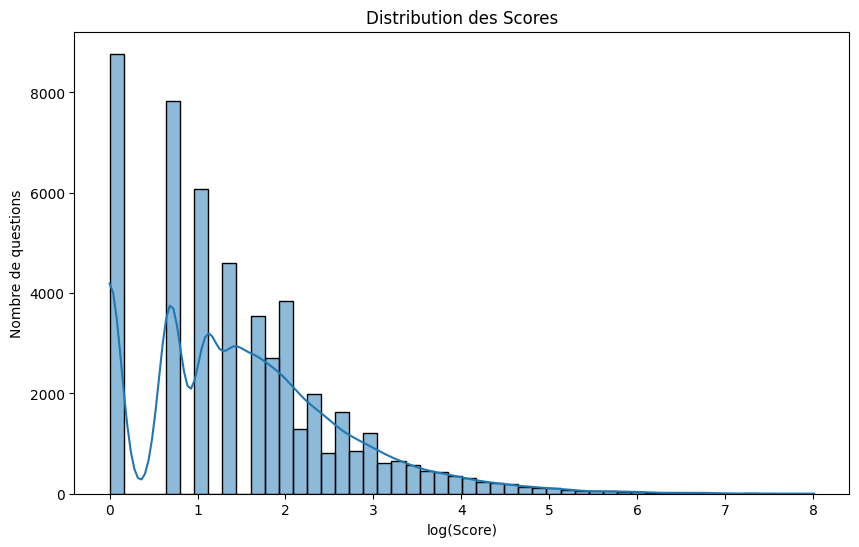

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution des scores
plt.figure(figsize=(10, 6))
sns.histplot(np.log(questions_data_df['Score']), bins=50, kde=True)
plt.title('Distribution des Scores')
plt.xlabel('log(Score)')
plt.ylabel('Nombre de questions')
plt.show()


Distribution du nombre de vues

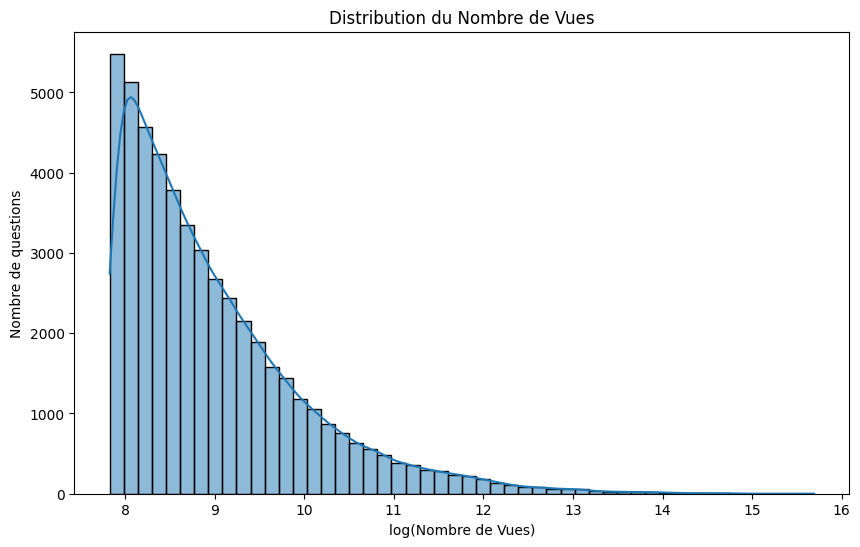

In [6]:
# Distribution du nombre de vues
plt.figure(figsize=(10, 6))
sns.histplot(np.log(questions_data_df['ViewCount']), bins=50, kde=True)
plt.title('Distribution du Nombre de Vues')
plt.xlabel('log(Nombre de Vues)')
plt.ylabel('Nombre de questions')
plt.show()


Distribution du nombre de favoris

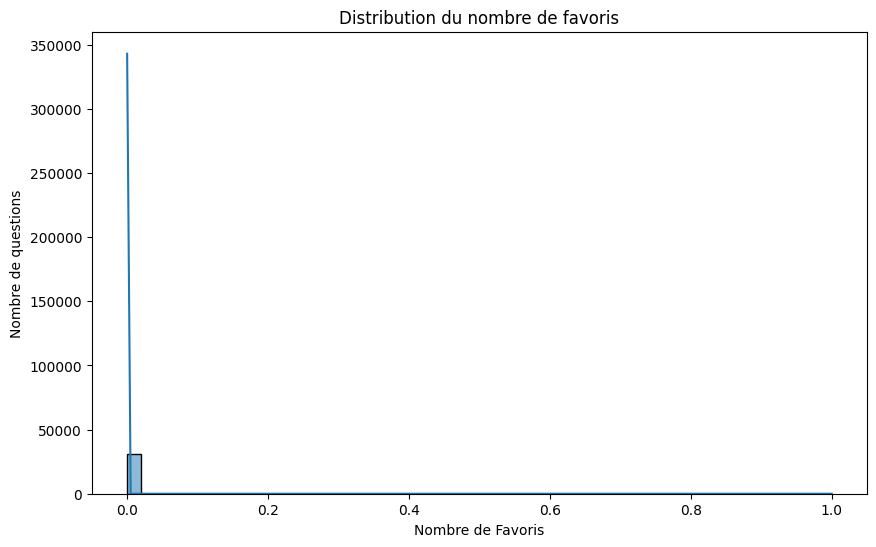

In [7]:
# Distribution du nombre de favoris
plt.figure(figsize=(10, 6))
sns.histplot(questions_data_df['FavoriteCount'], bins=50, kde=True)
plt.title('Distribution du nombre de favoris')
plt.xlabel('Nombre de Favoris')
plt.ylabel('Nombre de questions')
plt.show()


Distribution du nombre de réponses

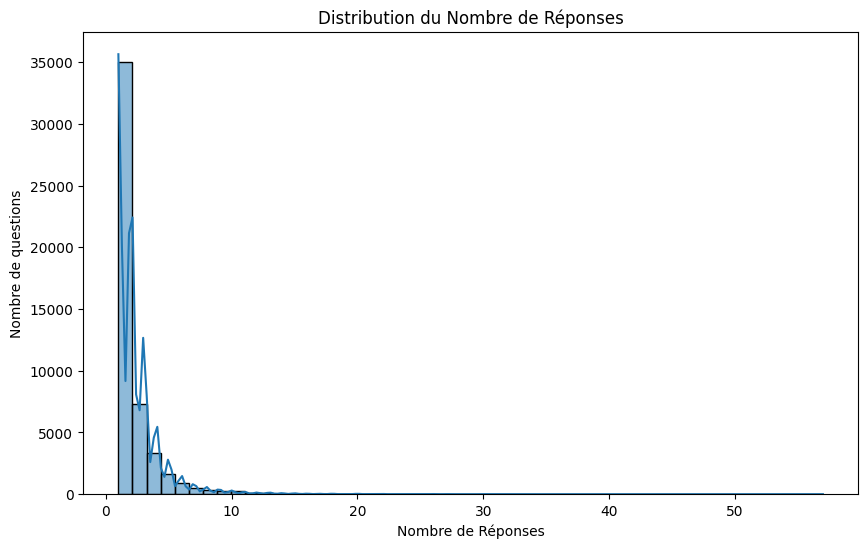

In [8]:
# Distribution du nombre de réponses
plt.figure(figsize=(10, 6))
sns.histplot(questions_data_df['AnswerCount'], bins=50, kde=True)
plt.title('Distribution du Nombre de Réponses')
plt.xlabel('Nombre de Réponses')
plt.ylabel('Nombre de questions')
plt.show()


Distribution du nombre de tags par question

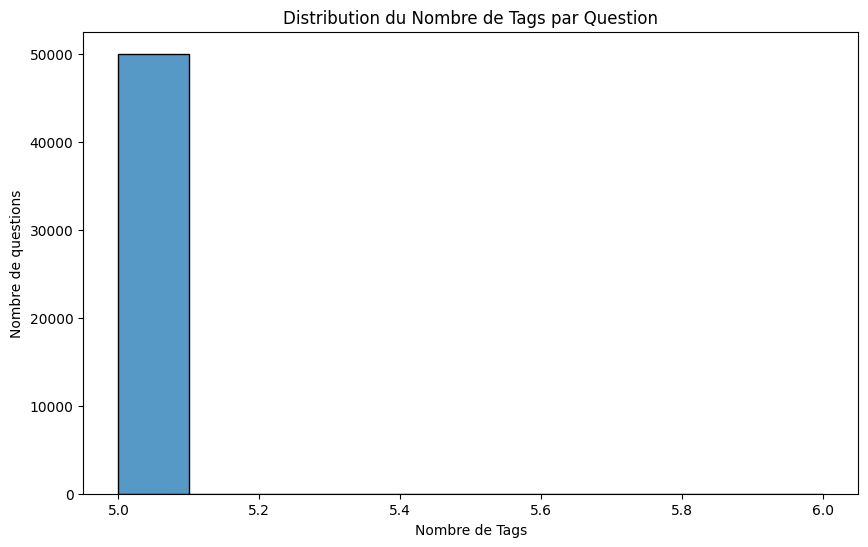

In [9]:
# Distribution du nombre de tags par question
questions_data_df['NumTags'] = questions_data_df['Tags'].apply(lambda x: len(x.split(',')))
plt.figure(figsize=(10, 6))
sns.histplot(questions_data_df['NumTags'], bins=10)
plt.title('Distribution du Nombre de Tags par Question')
plt.xlabel('Nombre de Tags')
plt.ylabel('Nombre de questions')
plt.show()


**Commentaires** : En faisant une requête SQL avec StackExchange Data Explorer, nous avions spécifié de n'avoir que minimum 5 tags, nous en avons ici 5 à chaque fois. 

### Analyse des tags les plus fréquents

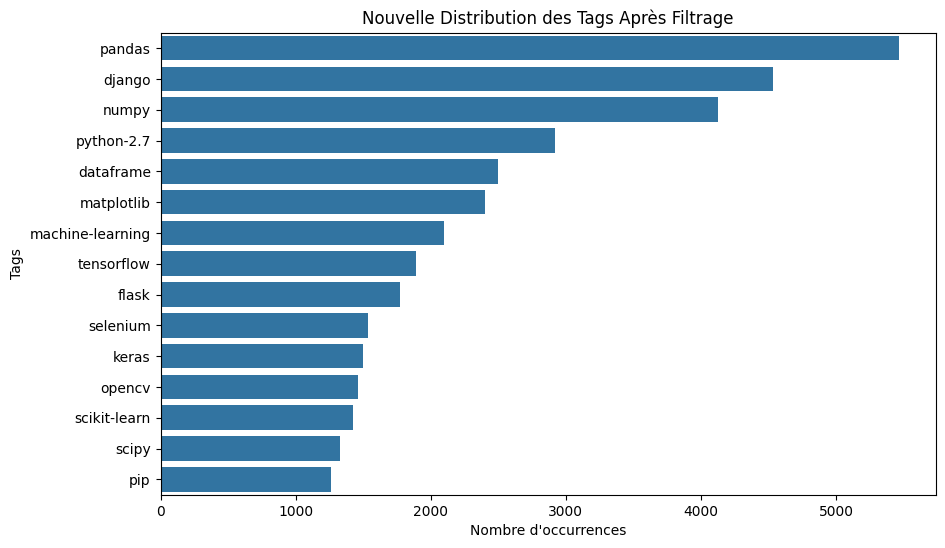

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Étape 1: Supprimer les tags "python" et "python-3.X" des données
def remove_unwanted_tags(tags_list):
    unwanted_tags = {'python', 'python-3.x'}
    return [tag for tag in tags_list if tag not in unwanted_tags]

# Étape supplémentaire: Convertir tous les tags en minuscules
def to_lowercase(tags_list):
    return [tag.lower() for tag in tags_list]

# Étape 3: Appliquer la conversion en minuscules, la suppression des tags, et splitter les tags pour obtenir des tags uniques
def process_tags(tags_str):
    tags_list = tags_str.split(',')
    tags_list = to_lowercase(tags_list)
    tags_list = remove_unwanted_tags(tags_list)
    return tags_list

# Appliquer le traitement aux données
questions_data_df['Tags'] = questions_data_df['Tags'].apply(process_tags)

# Étape 4: Compter les occurrences des tags après suppression des tags indésirables et processing
all_tags = [tag for tags_list in questions_data_df['Tags'] for tag in tags_list]
tag_counts = Counter(all_tags)

# Étape 5: Recalculer la distribution des tags restants
new_common_tags = tag_counts.most_common(15)
new_tags, new_counts = zip(*new_common_tags)

# Étape 6: Afficher la nouvelle distribution des tags
plt.figure(figsize=(10, 6))
sns.barplot(x=new_counts, y=new_tags)
plt.title('Nouvelle Distribution des Tags Après Filtrage')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Tags')
plt.show()



**Commentaires** : Sans surprise, le tag python est le plus présent, avec sinon dans le top 5 des tags les plus récurrents : pandas, django python-2.7, dataframe, et numpy.

## Filtrage des Tags

Nous allons garder pour la suite uniquement les 50 tags les plus fréquents, on a vu qu'il y en avait beaucoup de différents, on va donc maximiser nos futures performances de modèles en faisant cela.

## Analyse Multivariée

Matrice de corrélation

Nous allons examiner la matrice de corrélation pour identifier les relations linéaires entre les variables numériques.

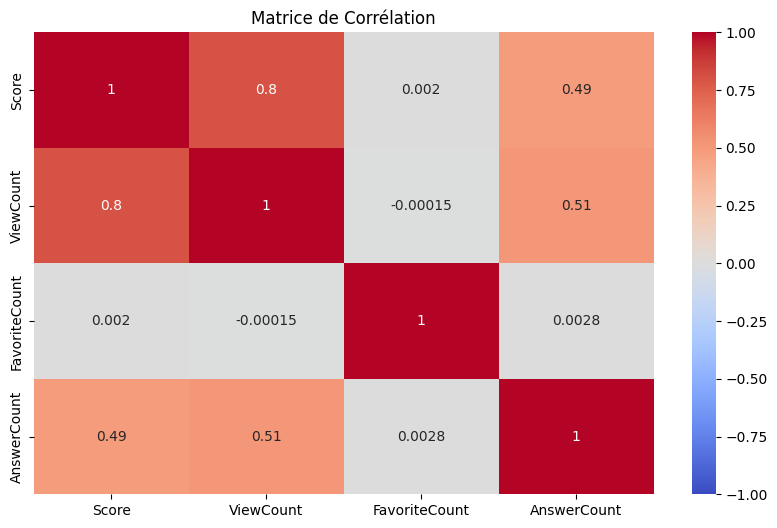

In [11]:
# Matrice de corrélation
corr_matrix = questions_data_df[['Score', 'ViewCount', 'FavoriteCount','AnswerCount']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


Scatter plots des variables corrélées

Nous allons visualiser les relations entre les paires de variables qui montrent des corrélations significatives.

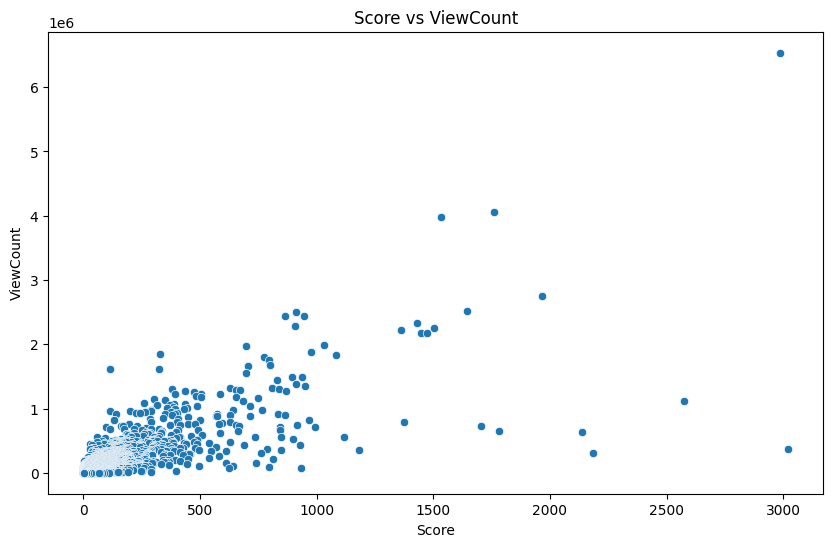

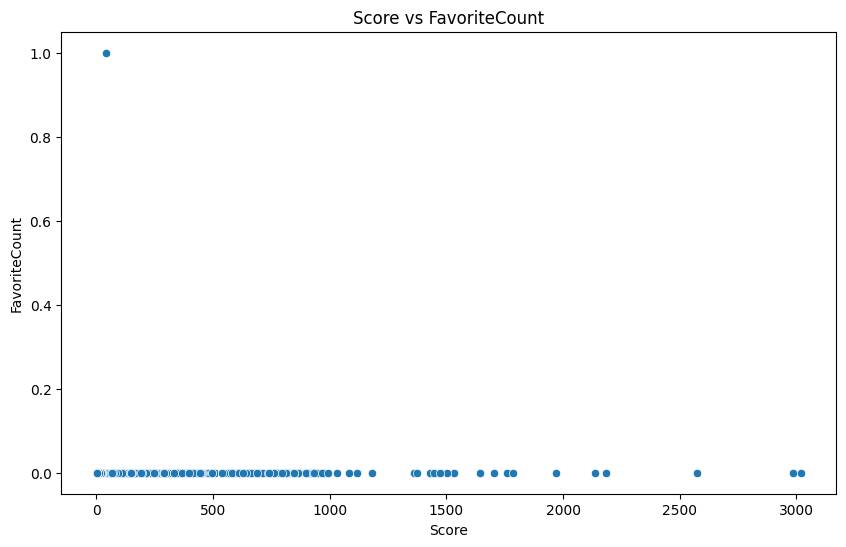

In [12]:
# Scatter plot Score vs ViewCount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='ViewCount', data=questions_data_df)
plt.title('Score vs ViewCount')
plt.xlabel('Score')
plt.ylabel('ViewCount')
plt.show()

# # Scatter plot Score vs FavoriteCount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='FavoriteCount', data=questions_data_df)
plt.title('Score vs FavoriteCount')
plt.xlabel('Score')
plt.ylabel('FavoriteCount')
plt.show()

# Scatter plot Score vs AnswerCount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Score', y='AnswerCount', data=questions_data_df)
plt.title('Score vs AnswerCount')
plt.xlabel('Score')
plt.ylabel('AnswerCount')
plt.show()


**Commentaires** :  Nous pouvons observer que pour le graphique Score VS ViewCount, nous avons une tendance linéaire positive, phénomène attendu. Autrement pour Favorite Count VS Score, nous pouvons pas réellment tier de conclusions étant donné que beaucoup  de données sont manquantes pour la variable FavoriteCount. Enfinn pour Score vsd AnswerCount, nous avons une relation entre les deux variables avec une tendance relativement positive mas qui reste assez aléatoire.

 Pair plot des variables numériques

Nous allons utiliser un pair plot pour visualiser les relations entre toutes les variables numériques simultanément.

In [13]:
# Pair plot des variables numériques
sns.pairplot(questions_data_df[['Score', 'ViewCount', 'FavoriteCount', 'AnswerCount']])
plt.show()


#### Analyse des interactions entre les tags et les autres variables

Nous allons examiner les tags les plus fréquents et comment ils influencent les autres variables comme le score et le nombre de vues.

##### Distribution du score pour les tags les plus fréquents

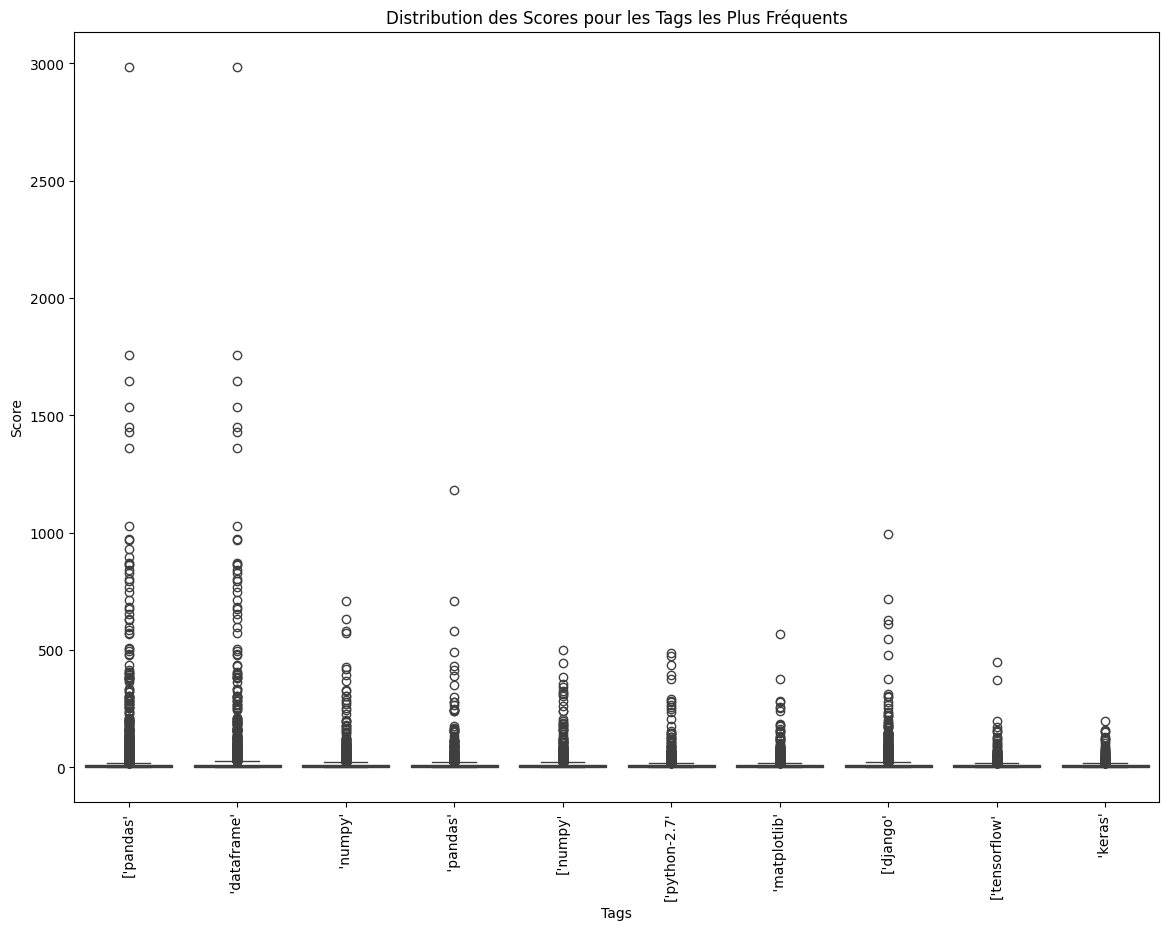

In [14]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Assurer que toutes les valeurs dans la colonne 'Tags' sont des chaînes de caractères, et remplir les NaN avec des chaînes vides
questions_data_df['Tags'] = questions_data_df['Tags'].astype(str).fillna('')

# Compter les occurrences des tags
all_tags = questions_data_df['Tags'].str.cat(sep=',').split(',')
tag_counts = Counter(all_tags)

# Distribution du score pour les tags les plus fréquents
top_tags = [tag for tag, count in tag_counts.most_common(10)]
df_top_tags = questions_data_df[questions_data_df['Tags'].apply(lambda x: any(tag in x for tag in top_tags))]

# "Exploser" la colonne 'Tags' pour créer une ligne par tag
df_top_tags_exploded = df_top_tags.assign(Tags=df_top_tags['Tags'].str.split(',')).explode('Tags')

# Filtrer le dataframe "explosé" pour n'inclure que les tags les plus fréquents
df_top_tags_exploded = df_top_tags_exploded[df_top_tags_exploded['Tags'].isin(top_tags)]

# Visualisation : Tracer la distribution des scores pour les tags les plus fréquents
plt.figure(figsize=(14, 10))
sns.boxplot(x='Tags', y='Score', data=df_top_tags_exploded)
plt.title('Distribution des Scores pour les Tags les Plus Fréquents')
plt.xlabel('Tags')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()



##### Distribution du nombre de vues pour les tags les plus fréquents

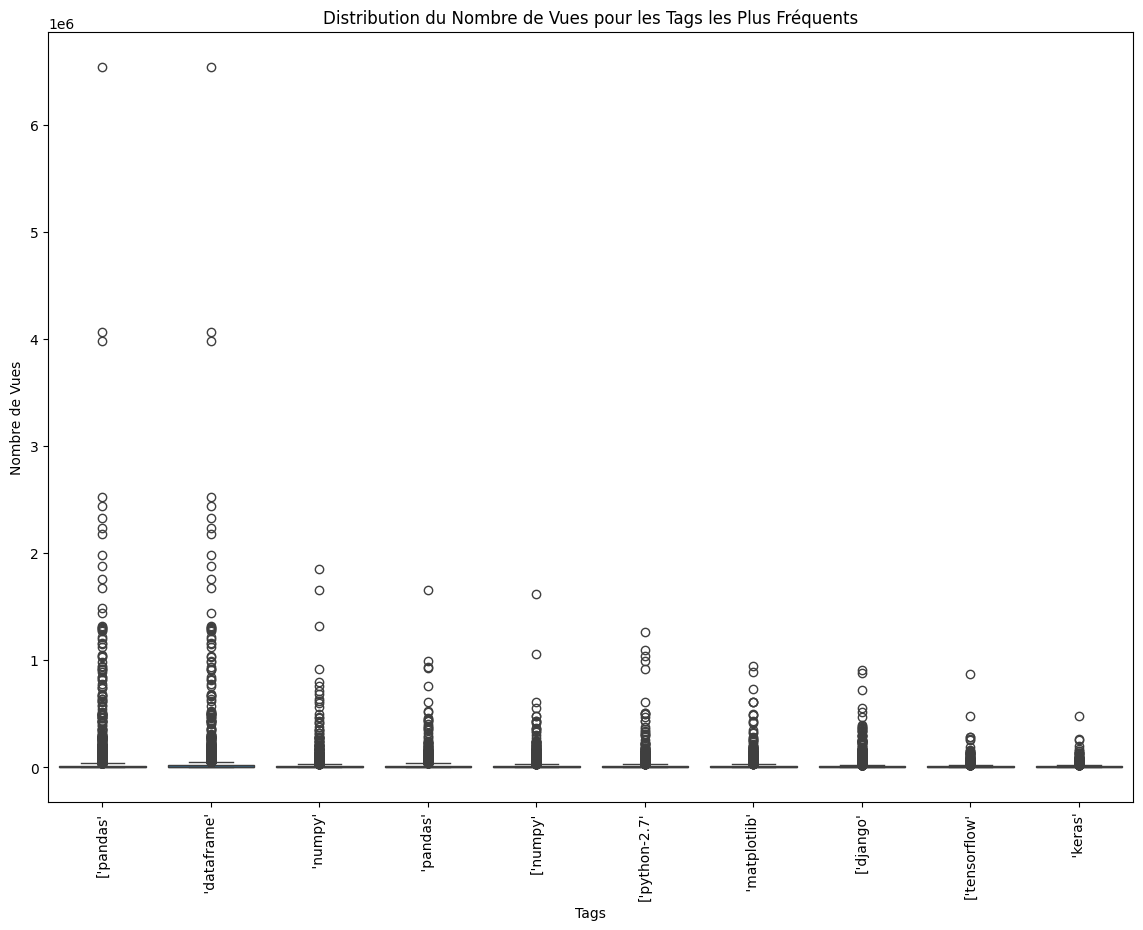

In [15]:
# Distribution du nombre de vues pour les tags les plus fréquents
plt.figure(figsize=(14, 10))
sns.boxplot(x='Tags', y='ViewCount', data=df_top_tags_exploded)
plt.title('Distribution du Nombre de Vues pour les Tags les Plus Fréquents')
plt.xlabel('Tags')
plt.ylabel('Nombre de Vues')
plt.xticks(rotation=90)
plt.show()


## Nettoyage des questions

Suppression des questions en double

In [16]:
questions_data_df.columns

Index(['Id', 'Title', 'ViewCount', 'Score', 'Body', 'Tags', 'CreationDate',
       'AnswerCount', 'FavoriteCount', 'NumTags'],
      dtype='object')

In [17]:
# Suppression des doublons
questions_data_df = questions_data_df.drop_duplicates(subset=['Id'])


Traitement des valeurs manquantes

In [18]:
# Calcul et affichage de la proportion de valeurs manquantes pour chaque colonne
missing_values = questions_data_df.isnull().mean() * 100
print("Proportion de valeurs manquantes pour chaque colonne :")
print(missing_values)

# Affichage des colonnes avec des valeurs manquantes
missing_values = missing_values[missing_values > 0]
print("Colonnes avec des valeurs manquantes :")
print(missing_values)


Proportion de valeurs manquantes pour chaque colonne :
Id                0.000
Title             0.000
ViewCount         0.000
Score             0.000
Body              0.000
Tags              0.000
CreationDate      0.000
AnswerCount       0.000
FavoriteCount    38.156
NumTags           0.000
dtype: float64
Colonnes avec des valeurs manquantes :
FavoriteCount    38.156
dtype: float64


Nous allons maintenant traiter les valeurs manquantes. Pour les colonnes critiques comme 'Title' et 'Body', nous allons supprimer les lignes avec des valeurs manquantes. Pour d'autres colonnes, nous pouvons soit imputer les valeurs manquantes, soit les ignorer si elles ne sont pas essentielles.

In [19]:
# Suppression des lignes avec des titres ou des corps de texte manquants
questions_data_df = questions_data_df.dropna(subset=['Title', 'Body'])

# Pour les autres colonnes, nous pouvons choisir de remplir les valeurs manquantes avec 0 ou la médiane, selon le cas.
questions_data_df['FavoriteCount'].fillna(0, inplace=True)
questions_data_df['ViewCount'].fillna(questions_data_df['ViewCount'].median(), inplace=True)
questions_data_df['AnswerCount'].fillna(questions_data_df['AnswerCount'].median(), inplace=True)
questions_data_df['Score'].fillna(questions_data_df['Score'].median(), inplace=True)


C:\Users\pdevi\AppData\Local\Temp\ipykernel_47432\894098988.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  questions_data_df['FavoriteCount'].fillna(0, inplace=True)
C:\Users\pdevi\AppData\Local\Temp\ipykernel_47432\894098988.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


### Nettoyage du texte des questions

In [21]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    """
    Nettoyer le texte en supprimant les balises HTML, les espaces multiples,
    et la ponctuation, tout en conservant les underscores (caractères de soulignement).

    Paramètres :
    - text : Le texte à nettoyer (chaîne de caractères).

    Retourne :
    - Le texte nettoyé en minuscules.
    """
    # Vérifier si l'entrée est bien une chaîne de caractères
    if not isinstance(text, str):
        return text
    # Supprimer les balises HTML
    text = BeautifulSoup(text, "html.parser").get_text()
    # Supprimer les espaces multiples
    text = re.sub(r'\s+', ' ', text)
    # Supprimer la ponctuation sauf les underscores (caractères de soulignement)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

# Appliquer la fonction de nettoyage au titre et au corps de la question
questions_data_df['CleanedTitle'] = questions_data_df['Title'].apply(clean_text)
questions_data_df['CleanedBody'] = questions_data_df['Body'].apply(clean_text)



C:\Users\pdevi\AppData\Local\Temp\ipykernel_47432\561776600.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


Nous allons vérifier s'il y a des doublons basés sur les textes nettoyés pour éviter les questions redondantes.

In [22]:
# Vérification des doublons après nettoyage
questions_data_df = questions_data_df.drop_duplicates(subset=['CleanedTitle', 'CleanedBody'])


Nous allons réexaminer les valeurs manquantes après avoir nettoyé les données pour nous assurer qu'il ne reste aucune donnée problématique.

In [23]:
# Recalcul et affichage de la proportion de valeurs manquantes pour chaque colonne après nettoyage
missing_values_after_cleaning = questions_data_df.isnull().mean() * 100
print("Proportion de valeurs manquantes pour chaque colonne après nettoyage :")
print(missing_values_after_cleaning)

# Affichage des colonnes avec des valeurs manquantes après nettoyage
missing_values_after_cleaning = missing_values_after_cleaning[missing_values_after_cleaning > 0]
print("Colonnes avec des valeurs manquantes après nettoyage :")
print(missing_values_after_cleaning)


Proportion de valeurs manquantes pour chaque colonne après nettoyage :
Id               0.0
Title            0.0
ViewCount        0.0
Score            0.0
Body             0.0
Tags             0.0
CreationDate     0.0
AnswerCount      0.0
FavoriteCount    0.0
NumTags          0.0
CleanedTitle     0.0
CleanedBody      0.0
dtype: float64
Colonnes avec des valeurs manquantes après nettoyage :
Series([], dtype: float64)


In [24]:
questions_data_df['CombinedText'] = questions_data_df['CleanedTitle'] + ' ' + questions_data_df['CleanedBody']


In [25]:
import pandas as pd
import re
import string
import gensim
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from multiprocessing import Pool
import re
import nltk
from nltk.corpus import stopwords
import spacy
from collections import Counter

# Charger le modèle de langue anglais de spaCy
nlp = spacy.load("en_core_web_sm")

# Fonction pour prétraiter le texte en utilisant spaCy
def preprocess_text_spacy(text):
    """
    Prétraiter le texte en utilisant spaCy en lemmatisant et en filtrant les noms et noms propres.

    Paramètres :
    - text : Le texte à prétraiter.

    Retourne :
    - tokens : Liste des tokens lemmatisés qui sont des noms ou noms propres.
    """
    doc = nlp(text)
    # Lemmatiser et filtrer les noms et noms propres
    tokens = [token.lemma_ for token in doc if token.pos_ in {'NOUN', 'PROPN'}]
    return tokens

# Fonction pour traiter davantage les tokens en supprimant les lettres individuelles
def post_process_tokens(tokens):
    """
    Traiter les tokens en supprimant ceux qui sont des lettres individuelles.

    Paramètres :
    - tokens : Liste des tokens à traiter.

    Retourne :
    - processed_tokens : Liste des tokens après suppression des lettres individuelles.
    """
    # Supprimer les lettres individuelles des tokens
    processed_tokens = [token for token in tokens if len(token) > 1]
    return processed_tokens

# Charger vos données (à adapter selon votre contexte)

# Appliquer la fonction preprocess_text_spacy à la colonne 'CombinedText'
questions_data_df['ProcessedText'] = questions_data_df['CombinedText'].apply(preprocess_text_spacy)
# Appliquer la fonction post_process_tokens pour enlever les lettres individuelles
questions_data_df['ProcessedText'] = questions_data_df['ProcessedText'].apply(post_process_tokens)

# Aplatir la liste de listes pour calculer les fréquences des mots
all_tokens = [token for tokens in questions_data_df['ProcessedText'] for token in tokens]
token_counts = Counter(all_tokens)

print("Les données ont été traitées et nettoyées !")
print(" ")



C:\Users\pdevi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Les données ont été traitées et nettoyées !
 


Sauvegarde du jeu de données traité : 

In [26]:
questions_data_treated_path = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Project_4/data_questions/BIG_DATA_processed.csv"

questions_data_df.to_csv(questions_data_treated_path, index=False)

## Feature engineering - Bag of Words, TF-IDF, WORD2VEC, DOC2VEC, BERT et USE

In [2]:
import pandas as pd
from gensim.models import Word2Vec, Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import gensim
import tensorflow_hub as hub
import tensorflow as tf
import gensim.downloader as api
import os
import shutil
import warnings
from transformers import BertModel, BertTokenizer
import torch
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
from transformers import DistilBertTokenizer, TFDistilBertModel
from torch.cuda.amp import autocast, GradScaler
from transformers import BertTokenizerFast

C:\Users\pdevi\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [48]:
# S'assurer que TensorFlow utilise le GPU
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    except:
        pass

# Activer la précision mixte si supportée
if tf.config.list_physical_devices('GPU'):
    tf.keras.mixed_precision.set_global_policy('mixed_float16')

# Initialiser le tokenizer et le modèle BERT
distilbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

# Fonction pour obtenir les embeddings BERT
def get_bert_embeddings(texts, tokenizer, model, batch_size=32):
    """
    Obtenir les embeddings BERT pour une liste de textes.

    Paramètres :
    - texts : Liste de textes à encoder.
    - tokenizer : Le tokenizer BERT.
    - model : Le modèle BERT.
    - batch_size : Taille du lot pour le traitement par lots.

    Retourne :
    - all_embeddings : Un tableau numpy avec les embeddings de tous les textes.
    """
    all_embeddings = []
    num_batches = (len(texts) + batch_size - 1) // batch_size
    
    for i in tqdm(range(num_batches), desc="Processing Batches"):
        batch_texts = texts[i * batch_size:(i + 1) * batch_size]
        inputs = tokenizer(batch_texts, return_tensors='tf', truncation=True, padding=True, max_length=512)
        outputs = model(inputs)
        batch_embeddings = tf.reduce_mean(outputs.last_hidden_state, axis=1).numpy()
        all_embeddings.append(batch_embeddings)
    
    return np.vstack(all_embeddings)

# Fonction pour obtenir l'embedding USE
def get_use_embedding(text, model):
    """
    Obtenir l'embedding Universal Sentence Encoder (USE) pour un texte donné.

    Paramètres :
    - text : Liste de tokens représentant le texte.
    - model : Modèle USE.

    Retourne :
    - Embedding USE sous forme de vecteur numpy.
    """
    return model([' '.join(text)]).numpy()[0]  # Joindre les tokens en une seule chaîne de caractères

# Fonction pour obtenir l'embedding Word2Vec
def get_word2vec_embedding(text, model):
    """
    Obtenir l'embedding Word2Vec pour un texte donné.

    Paramètres :
    - text : Liste de tokens représentant le texte.
    - model : Modèle Word2Vec.

    Retourne :
    - Embedding Word2Vec sous forme de vecteur numpy.
    """
    word_vectors = [model[word] for word in text if word in model]
    if len(word_vectors) == 0:
        return np.zeros(100)  # Supposons des vecteurs GloVe de 100 dimensions
    return np.mean(word_vectors, axis=0)

# Effacer le cache de TensorFlow Hub si nécessaire
tfhub_cache_dir = os.path.expanduser('~/.cache/tfhub_modules')
if os.path.exists(tfhub_cache_dir):
    shutil.rmtree(tfhub_cache_dir)

# Télécharger manuellement le modèle Universal Sentence Encoder (USE)
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model_path = os.path.join(os.getcwd(), "universal-sentence-encoder")

if not os.path.exists(use_model_path):
    print("Téléchargement du modèle USE...")
    os.makedirs(use_model_path)
    tf.keras.utils.get_file(
        fname=os.path.join(use_model_path, "use_model.tar.gz"),
        origin=use_model_url + "?tf-hub-format=compressed"
    )
    shutil.unpack_archive(
        os.path.join(use_model_path, "use_model.tar.gz"),
        use_model_path
    )


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [4]:
import cloudpickle
import pandas as pd 
questions_data_treated_path = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Project_4/data_questions/BIG_DATA_processed.csv"

questions_data_df=pd.read_csv(questions_data_treated_path,)

print(questions_data_df['ProcessedText'].shape)



# Modèle TF-IDF
tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x: x)
tfidf_matrix = tfidf_vectorizer.fit_transform(questions_data_df['ProcessedText'])
print(tfidf_matrix.shape)
print("TF-IDF done!")
import os

# Définir le chemin de sauvegarde pour les vectoriseurs et les modèles
vectorizer_save_path = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Project_4/API/vectorizers/"

# S'assurer que le répertoire existe
if not os.path.exists(vectorizer_save_path):
    os.makedirs(vectorizer_save_path)


# # Save TF-IDF Vectorizer
tfidf_vectorizer_path = os.path.join(vectorizer_save_path, "tfidf_vectorizer.pkl")

# Save the TF-IDF Vectorizer using cloudpickle
with open(tfidf_vectorizer_path, 'wb') as f:
    cloudpickle.dump(tfidf_vectorizer, f)
print(f"TF-IDF Vectorizer saved at {tfidf_vectorizer_path}")


(50000,)
(50000, 904)
TF-IDF done!
TF-IDF Vectorizer saved at C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Project_4/API/vectorizers/tfidf_vectorizer.pkl


#### Conversion des textes de questions en vecteurs de mots

In [3]:
import ast
import cloudpickle

# Chemin vers le fichier CSV contenant les données traitées
questions_data_treated_path = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Project_4/data_questions/BIG_DATA_processed.csv"


# Charger les données dans un DataFrame
questions_data_df = pd.read_csv(questions_data_treated_path)

# Modèle TF-IDF
tfidf_vectorizer = TfidfVectorizer(analyzer=lambda x: x)
tfidf_matrix = tfidf_vectorizer.fit_transform(questions_data_df['ProcessedText'])
print("TF-IDF done!")


# Obtenir les embeddings BERT pour les textes traités
bert_embeddings = get_bert_embeddings(questions_data_df['ProcessedText'].tolist(), distilbert_tokenizer, distilbert_model)
print("BERT done !")

# Modèle Bag of Words (BOW)
vectorizer = CountVectorizer(analyzer=lambda x :x , max_features=50000)
bow_matrix = vectorizer.fit_transform(questions_data_df['ProcessedText']).toarray()
print("BoW matrix done !")

# Charger le modèle Word2Vec pré-entraîné
word2vec_model = api.load("glove-wiki-gigaword-100")  # Utilisation des embeddings GloVe par exemple
word2vec_embeddings = np.array([get_word2vec_embedding(text, word2vec_model) for text in questions_data_df['ProcessedText']])
print("WORD2VEC done!")

# Modèle Doc2Vec
tagged_data = [TaggedDocument(words=text, tags=[str(i)]) for i, text in enumerate(questions_data_df['ProcessedText'])]
doc2vec_model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=1, workers=4)
doc2vec_features = np.array([doc2vec_model.dv[str(i)] for i in range(len(questions_data_df['ProcessedText']))])
print("DOC2VEC done!")

# Charger le modèle Universal Sentence Encoder (USE)
use_model = hub.load(use_model_path)
# Générer les embeddings USE
use_embeddings = np.array([get_use_embedding(text, use_model) for text in questions_data_df['ProcessedText']])
print("USE done !")

# Combiner toutes les caractéristiques
combined_features = {
    'BoW': bow_matrix,
    'TF-IDF': tfidf_matrix,
    'Word2Vec': word2vec_embeddings, 
    'Doc2Vec': doc2vec_features,
    'BERT': bert_embeddings,
    'USE': use_embeddings
}

# Sauvegarder les caractéristiques combinées dans un fichier .npy
save_path = "C:\\Users\\pdevi\\OneDrive\\Desktop\\OpenClassrooms\\Project_4\\embeddings_data\\combined_features.npy"
np.save(save_path, combined_features)



In [33]:
import os
import joblib
import cloudpickle
# Définir le chemin de sauvegarde pour les vectoriseurs et les modèles
vectorizer_save_path = "C:\\Users\\pdevi\\OneDrive\\Desktop\\OpenClassrooms\\Project_4\\API\\vectorizers"

# S'assurer que le répertoire existe
if not os.path.exists(vectorizer_save_path):
    os.makedirs(vectorizer_save_path)


# # Save TF-IDF Vectorizer
tfidf_vectorizer_path = os.path.join(vectorizer_save_path, "tfidf_vectorizer.pkl")
# Save the TF-IDF Vectorizer using cloudpickle
with open(tfidf_vectorizer_path, 'wb') as f:
    cloudpickle.dump(tfidf_vectorizer, f)
print(f"TF-IDF Vectorizer saved at {tfidf_vectorizer_path}")

# Sauvegarder le vectoriseur BoW
bow_vectorizer_path = os.path.join(vectorizer_save_path, "bow_vectorizer.pkl")
joblib.dump(vectorizer, bow_vectorizer_path)
print(f"BoW Vectorizer saved at {bow_vectorizer_path}")

# Sauvegarder le modèle Word2Vec
word2vec_model_path = os.path.join(vectorizer_save_path, "word2vec_model.pkl")
joblib.dump(word2vec_model, word2vec_model_path)
print(f"Word2Vec model saved at {word2vec_model_path}")

# Sauvegarder le modèle Doc2Vec
doc2vec_model_path = os.path.join(vectorizer_save_path, "doc2vec_model.pkl")
joblib.dump(doc2vec_model, doc2vec_model_path)
print(f"Doc2Vec model saved at {doc2vec_model_path}")

# Sauvegarder l'URL du modèle USE (car le modèle réel ne peut pas être sauvegardé directement)
use_model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
use_model_url_path = os.path.join(vectorizer_save_path, "use_model_url.pkl")
joblib.dump(use_model_url, use_model_url_path)
print(f"USE model URL saved at {use_model_url_path}")

# Sauvegarder le tokenizer et le modèle BERT
bert_tokenizer_path = os.path.join(vectorizer_save_path, "bert_tokenizer")
bert_model_path = os.path.join(vectorizer_save_path, "bert_model")

# Sauvegarder le tokenizer (DistilBERT dans ce cas)
distilbert_tokenizer.save_pretrained(bert_tokenizer_path)
# Sauvegarder le modèle BERT
distilbert_model.save_pretrained(bert_model_path)

print(f"BERT tokenizer saved at {bert_tokenizer_path}")
print(f"BERT model saved at {bert_model_path}")


TF-IDF Vectorizer saved at C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Project_4\API\vectorizers\tfidf_vectorizer.pkl
BoW Vectorizer saved at C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Project_4\API\vectorizers\bow_vectorizer.pkl
Word2Vec model saved at C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Project_4\API\vectorizers\word2vec_model.pkl
Doc2Vec model saved at C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Project_4\API\vectorizers\doc2vec_model.pkl
USE model URL saved at C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Project_4\API\vectorizers\use_model_url.pkl
BERT tokenizer saved at C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Project_4\API\vectorizers\bert_tokenizer
BERT model saved at C:\Users\pdevi\OneDrive\Desktop\OpenClassrooms\Project_4\API\vectorizers\bert_model


## Réduction de Dimension

### PCA

In [1]:
import numpy as np
import os
from sklearn.decomposition import PCA

# Charger les caractéristiques combinées
save_path = "C:\\Users\\pdevi\\OneDrive\\Desktop\\OpenClassrooms\\Project_4\\embeddings_data\\combined_features.npy"
combined_features = np.load(save_path, allow_pickle=True).item()

import os
import shutil
import numpy as np
from sklearn.decomposition import PCA

# Charger les caractéristiques combinées
combined_features_path = "C:/Users/pdevi/OneDrive/Desktop/OpenClassrooms/Project_4/embeddings_data/combined_features.npy"
combined_features = np.load(combined_features_path, allow_pickle=True).item()

# Fonction pour appliquer la PCA et sauvegarder les résultats
def apply_pca_and_save(features, n_components, save_dir, feature_name):
    """
    Appliquer l'analyse en composantes principales (PCA) sur un ensemble de caractéristiques
    et sauvegarder les résultats dans un fichier .npy.

    Paramètres :
    - features : Les caractéristiques sur lesquelles appliquer la PCA.
    - n_components : Le nombre de composantes principales à conserver.
    - save_dir : Le répertoire où sauvegarder les résultats de la PCA.
    - feature_name : Le nom des caractéristiques (pour nommer le fichier de sauvegarde).

    Retourne :
    - pca_result : Les résultats de la PCA sous forme de tableau numpy.
    """
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features)
    save_path = os.path.join(save_dir, f"{feature_name}_pca.npy")
    np.save(save_path, pca_result)
    return pca_result

# Répertoire pour sauvegarder les résultats de la PCA
save_dir = "C:\\Users\\pdevi\\OneDrive\\Desktop\\OpenClassrooms\\Project_4\\embeddings_data"

# Appliquer la PCA à chaque ensemble de caractéristiques et sauvegarder
pca_results = {}
for feature_name, features in combined_features.items():
    print(f"Applying PCA to {feature_name} features...")
    print(features.shape)
    pca_results[feature_name] = apply_pca_and_save(features, n_components=2, save_dir=save_dir, feature_name=feature_name)

# Optionnellement, sauvegarder le dictionnaire des résultats de la PCA
pca_results_save_path = os.path.join(save_dir, "pca_results.npy")
np.save(pca_results_save_path, pca_results)

print("PCA applied to all feature sets and results saved.")


Applying PCA to BoW features...
(50000, 904)
Applying PCA to TF-IDF features...
(50000, 904)
Applying PCA to Word2Vec features...
(50000, 100)
Applying PCA to Doc2Vec features...
(50000, 100)
Applying PCA to BERT features...
(50000, 768)
Applying PCA to USE features...
(50000, 512)
PCA applied to all feature sets and results saved.
